In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [2]:
house_data = pd.read_csv("Raw Data/clean_house_data.csv",low_memory = False)
price_data = pd.read_csv('Raw Data/price.csv', low_memory = False)
price_df = pd.DataFrame(price_data)
imp_df = pd.DataFrame(house_data)
imp_df

,BATHRM,HF_BATHRM,ROOMS,BEDRM,SALEDATE,KITCHENS,FIREPLACES,LANDAREA,ZIPCODE,WARD,PRIME,AC_N,AC_Y,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW,INDEX_BIN
0,3,1,8,4,2011.0,2.0,1,1627,20009.0,2,3.250000,0.0,1.0,0.0,1.0,0.0,0.0,41
1,3,1,7,3,2018.0,2.0,1,1424,20009.0,2,5.125000,0.0,1.0,0.0,1.0,0.0,0.0,57
2,3,1,5,3,2011.0,2.0,1,1815,20009.0,2,3.250000,0.0,1.0,0.0,1.0,0.0,0.0,52
3,3,1,8,3,2010.0,1.0,0,1424,20009.0,2,3.250000,0.0,1.0,0.0,1.0,0.0,0.0,49
4,3,1,9,3,2001.0,2.0,1,1424,20009.0,2,6.772727,0.0,1.0,0.0,1.0,0.0,0.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46129,2,0,10,4,2004.0,2.0,0,5837,20032.0,8,4.750000,1.0,0.0,0.0,0.0,0.0,1.0,3
46130,2,0,10,4,2016.0,2.0,0,5302,20032.0,8,3.750000,0.0,1.0,0.0,0.0,0.0,1.0,7
46131,2,0,10,5,2012.0,2.0,0,5348,20032.0,8,3.250000,1.0,0.0,0.0,0.0,0.0,1.0,3
46132,2,0,10,4,2017.0,2.0,0,3046,20032.0,8,4.250000,1.0,0.0,0.0,0.0,0.0,1.0,8


In [3]:
imp_df = pd.merge(imp_df, price_df, left_index=True, right_index=True)
imp_df.head()

,BATHRM,HF_BATHRM,ROOMS,BEDRM,SALEDATE,KITCHENS,FIREPLACES,LANDAREA,ZIPCODE,WARD,PRIME,AC_N,AC_Y,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW,INDEX_BIN,PRICE
0,3,1,8,4,2011.0,2.0,1,1627,20009.0,2,3.250000,0.0,1.0,0.0,1.0,0.0,0.0,41,1050000.0
1,3,1,7,3,2018.0,2.0,1,1424,20009.0,2,5.125000,0.0,1.0,0.0,1.0,0.0,0.0,57,1430000.0
2,3,1,5,3,2011.0,2.0,1,1815,20009.0,2,3.250000,0.0,1.0,0.0,1.0,0.0,0.0,52,1325000.0
3,3,1,8,3,2010.0,1.0,0,1424,20009.0,2,3.250000,0.0,1.0,0.0,1.0,0.0,0.0,49,1240000.0
4,3,1,9,3,2001.0,2.0,1,1424,20009.0,2,6.772727,0.0,1.0,0.0,1.0,0.0,0.0,23,592250.0


C:\Users\FrantheMan\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\FrantheMan\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


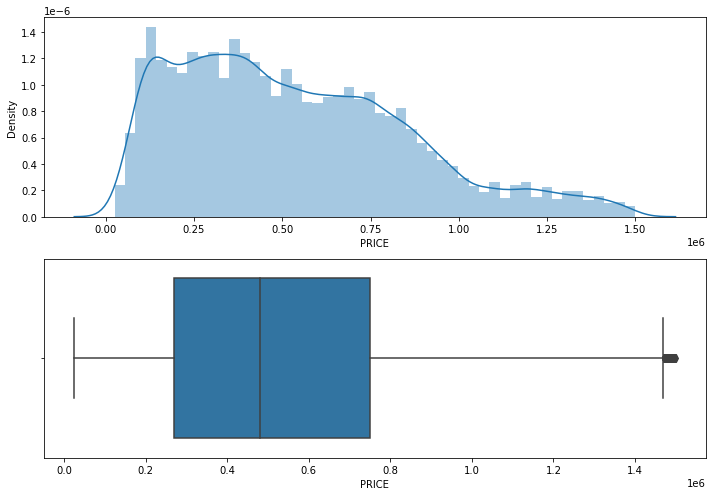

In [22]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(imp_df.PRICE)
fig.add_subplot(2,1,2)
sns.boxplot(imp_df.PRICE)
plt.tight_layout()

In [4]:
imp_df = imp_df.drop('INDEX_BIN',axis= 1)

In [5]:
X = imp_df.copy()
X = X.drop("PRICE", axis = 1)
y = imp_df['PRICE'].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [29]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 40
hidden_nodes_layer2 = 40
hidden_nodes_layer3 = 40
hidden_nodes_layer4 = 40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 40)                720       
                                                                 
 dense_16 (Dense)            (None, 40)                1640      
                                                                 
 dense_17 (Dense)            (None, 40)                1640      
                                                                 
 dense_18 (Dense)            (None, 40)                1640      
                                                                 
 dense_19 (Dense)            (None, 1)                 41        
                                                                 
Total params: 5,681
Trainable params: 5,681
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="Adam",metrics=["accuracy"])

In [32]:
nn.fit(X_train_scaled,y_train, batch_size=1000,epochs=200)


Epoch 1/200
31/31 [==============================] - 0s 2ms/step - loss: -1316445799701786132480.0000 - accuracy: 0.0000e+00
Epoch 2/200
31/31 [==============================] - 0s 2ms/step - loss: -1320095263512328142848.0000 - accuracy: 0.0000e+00
Epoch 3/200
31/31 [==============================] - 0s 2ms/step - loss: -1323744305110405087232.0000 - accuracy: 0.0000e+00
Epoch 4/200
31/31 [==============================] - 0s 2ms/step - loss: -1327416709131549016064.0000 - accuracy: 0.0000e+00
Epoch 5/200
31/31 [==============================] - 0s 2ms/step - loss: -1331080246690926559232.0000 - accuracy: 0.0000e+00
Epoch 6/200
31/31 [==============================] - 0s 2ms/step - loss: -1334769257735696416768.0000 - accuracy: 0.0000e+00
Epoch 7/200
31/31 [==============================] - 0s 2ms/step - loss: -1338462913117582000128.0000 - accuracy: 0.0000e+00
Epoch 8/200
31/31 [==============================] - 0s 2ms/step - loss: -1342158257349327847424.0000 - accuracy: 0.0000e+00


31/31 [==============================] - 0s 2ms/step - loss: -1572956619990485696512.0000 - accuracy: 0.0000e+00
Epoch 67/200
31/31 [==============================] - 0s 2ms/step - loss: -1577216040075559698432.0000 - accuracy: 0.0000e+00
Epoch 68/200
31/31 [==============================] - 0s 2ms/step - loss: -1581482497035051466752.0000 - accuracy: 0.0000e+00
Epoch 69/200
31/31 [==============================] - 0s 2ms/step - loss: -1585747828094636392448.0000 - accuracy: 0.0000e+00
Epoch 70/200
31/31 [==============================] - 0s 2ms/step - loss: -1590033003140079419392.0000 - accuracy: 0.0000e+00
Epoch 71/200
31/31 [==============================] - 0s 2ms/step - loss: -1594324652109986791424.0000 - accuracy: 0.0000e+00
Epoch 72/200
31/31 [==============================] - 0s 2ms/step - loss: -1598625730491613970432.0000 - accuracy: 0.0000e+00
Epoch 73/200
31/31 [==============================] - 0s 2ms/step - loss: -1602931030997891809280.0000 - accuracy: 0.0000e+00
Epoch

31/31 [==============================] - 0s 2ms/step - loss: -1864458016846551973888.0000 - accuracy: 0.0000e+00
Epoch 131/200
31/31 [==============================] - 0s 2ms/step - loss: -1869325985831274414080.0000 - accuracy: 0.0000e+00
Epoch 132/200
31/31 [==============================] - 0s 2ms/step - loss: -1874216613551622062080.0000 - accuracy: 0.0000e+00
Epoch 133/200
31/31 [==============================] - 0s 2ms/step - loss: -1879108648646853263360.0000 - accuracy: 0.0000e+00
Epoch 134/200
31/31 [==============================] - 0s 2ms/step - loss: -1884007439141525520384.0000 - accuracy: 0.0000e+00
Epoch 135/200
31/31 [==============================] - 0s 2ms/step - loss: -1888926636572009299968.0000 - accuracy: 0.0000e+00
Epoch 136/200
31/31 [==============================] - 0s 2ms/step - loss: -1893841048927888998400.0000 - accuracy: 0.0000e+00
Epoch 137/200
31/31 [==============================] - 0s 2ms/step - loss: -1898781919931579498496.0000 - accuracy: 0.0000e+0

31/31 [==============================] - 0s 2ms/step - loss: -2197213934401703903232.0000 - accuracy: 0.0000e+00
Epoch 195/200
31/31 [==============================] - 0s 2ms/step - loss: -2202764480204949684224.0000 - accuracy: 0.0000e+00
Epoch 196/200
31/31 [==============================] - 0s 2ms/step - loss: -2208329944181961129984.0000 - accuracy: 0.0000e+00
Epoch 197/200
31/31 [==============================] - 0s 2ms/step - loss: -2213890623084368494592.0000 - accuracy: 0.0000e+00
Epoch 198/200
31/31 [==============================] - 0s 2ms/step - loss: -2219477619897098305536.0000 - accuracy: 0.0000e+00
Epoch 199/200
31/31 [==============================] - 0s 2ms/step - loss: -2225060957535130877952.0000 - accuracy: 0.0000e+00
Epoch 200/200
31/31 [==============================] - 0s 2ms/step - loss: -2230661324409254445056.0000 - accuracy: 0.0000e+00


In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

476/476 - 0s - loss: -8.1039e+06 - accuracy: 0.0000e+00 - 367ms/epoch - 772us/step
Loss: -8103945.0, Accuracy: 0.0
